# Automatic Differentiation - Worksheet 6


## (1) Numerical Solver for Burger's Equation


$$
\frac{\partial{u}}{\partial{t}} + \frac{\partial}{\partial{x}}(\frac{u^2}{2}) = 0
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def upwind(u, i):
    local_average = (u[i+1] + u[i-1]) / 2
    if local_average < 0:
        return ((u[i+1] ** 2) - (u[i] ** 2)) / dx
    if local_average >= 0:
        return ((u[i] ** 2) - (u[i-1] ** 2)) / dx
    return 0

In [3]:
def solver(u):
    for n in range(iterations - 1):
        for i in range(0, Nx - 1):
            u[i, n+1] = u[i, n] - dt / 2 * upwind(u[:, n], i)
            
        # Periodic boundary conditions
        u[-1, n+1] = u[0, n+1]
    return u

In [4]:
Lx = 2*np.pi
Nx = 32
dx = Lx / Nx
dt = dx
iterations = 40

initial_state = np.asarray( [np.sin(3 * x) if (x < np.pi and x > np.pi/2) else 0.0 for x in np.linspace(0,Lx,Nx)] ) # 1D initial state array
u = np.zeros((Nx, iterations))
u[:, 0] = initial_state

u = solver(u)

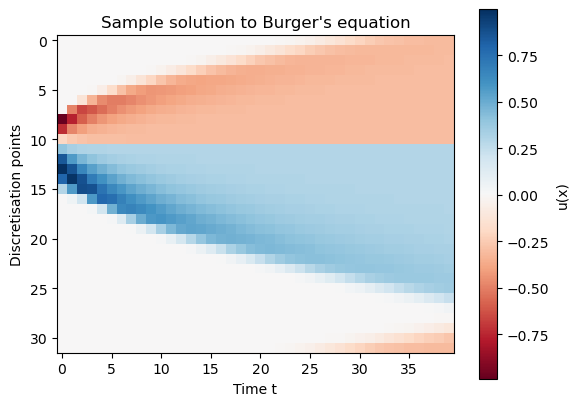

In [5]:
plt.figure(facecolor='white')
img = plt.imshow(u, cmap='RdBu')
plt.ylabel('Discretisation points')
plt.xlabel('Time t')
plt.title('Sample solution to Burger\'s equation')
plt.colorbar(img, label='u(x)')
plt.show()

## (2) Backpropagation


In [6]:
def gradient(u, i, n):
    local_average = (u[i+1, n] + u[i-1, n]) / 2
    if local_average < 0:
        return 1 - (dt / dx * (u[i+1, n] - u[i, n]))
    if local_average >= 0:
        return 1 - (dt / dx * (u[i, n] - u[i-1, n]))

## (3) Reconstructing Initial Condition

In [7]:
def loss():
    return np.sum((u[:, -1] - target_state) ** 2)

In [8]:
learning_rate = 0.001
max_iterations = 500

def gradient_descent(u):
    loss_history = []
    for iter in range(max_iterations):
        loss_value = loss()
        loss_history.append(loss_value)
        if iter % 50 == 0:
            print(f"Iteration {iter}: Loss = {loss_value}")
        
        if loss_value < 0.1:
            break

        for n in range(iterations - 1):
            for i in range(1, Nx - 1):
                grad = gradient(u, i, n)
                u[i, n+1] -= learning_rate * grad

        # Periodic boundary conditions
        u[-1, n+1] = u[0, n+1]

    return u, loss_history

In [9]:
target_state = np.load('burgers_target_state.npy')

Lx = 2*np.pi
Nx = 32
dx = Lx / Nx
dt = 0.1 * dx
iterations = 15

u = np.random.rand(Nx, iterations)
x = np.linspace(0, Lx, Nx)

u_optimized, loss_history = gradient_descent(u)

Iteration 0: Loss = 56.1352280788815
Iteration 50: Loss = 54.04182088697634
Iteration 100: Loss = 52.728435399977556
Iteration 150: Loss = 51.567105170758694
Iteration 200: Loss = 50.571433598828634
Iteration 250: Loss = 49.72476015626723
Iteration 300: Loss = 49.0407094730419
Iteration 350: Loss = 48.506333003399774
Iteration 400: Loss = 48.105671638982734
Iteration 450: Loss = 47.86164870542224


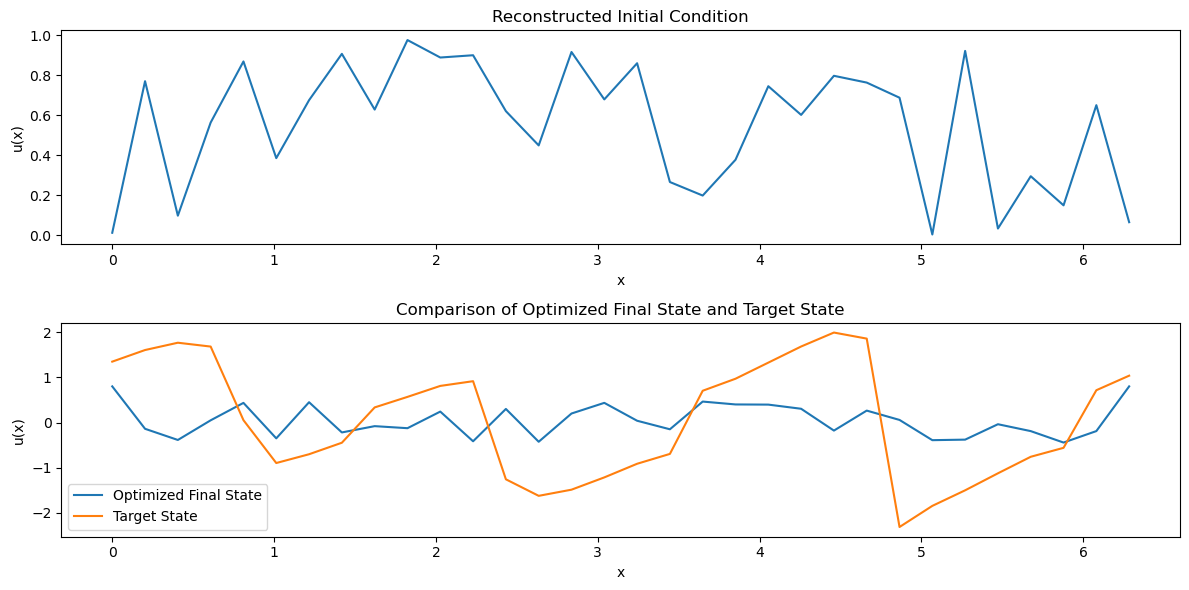

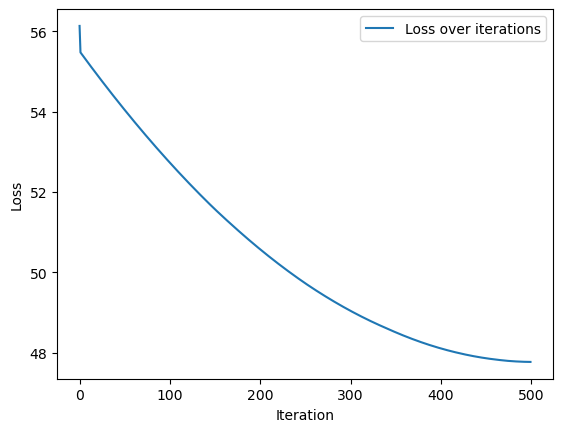

In [10]:
# Plot initial condition
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x, u_optimized[:, 0])
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Reconstructed Initial Condition')

# Plot final state and target state for comparison
plt.subplot(2, 1, 2)
plt.plot(x, u_optimized[:, -1], label='Optimized Final State')
plt.plot(x, target_state, label='Target State')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Comparison of Optimized Final State and Target State')

plt.tight_layout()
plt.show()

# Plot loss over optimization steps
plt.plot(loss_history, label='Loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()